<h1><b>Homework I</b></h1>

<i>Introduction to Cryptography &ndash; Loyola University Chicago - Spring 2024</i>

<div style="margin-top:32px;">
<font style="font-size: large;">
    <b>Name:</b> 
    Alina Zacaria
</font>
</div>



## **P0:** Self-Assessment

`Undergraduate Students & Graduate Students:`

- Please give resources used (and to what extent) on this homework assignment.

 - Name one problem that:

    + you are sure about;

    + you would like feedback on.

 - Look back at the definitions, theorems, concepts, and questions-of-the-week from the past two weeks. Place them into one of three columns.

| happy: | :need review: | :unhappy |
| --- | --- | --- |
| euclid's algo, euler's totient | groups | fields |


 - **Agree:** 
 Next week, I should seek more help from my group members or Piazza, or [Drop in](https://appt.link/lauve-meetings) for a visit with my professor.

# Math/Comp 331

``Undergraduate Students:`` submit solutions to all exercises in this collection, plus the **Self Assessment** above.

**Important Notes.** 

- On problems that require some mathematical calculations, you may use markdown cells with $\LaTeX{}$ or upload a PDF or PNG file. 
<br>
(Be sure to indicate the file name if you don't import your solution directly beneath the problem statement.)

- All functions you code in this class as part of your solutions should include a doc string (within triple-quotes, as I did in P2 below). 
<br>(Additionally, particularly lengthy blocks of code should include a comment or two for the reader.)

## **P1:** Markdown &amp; LaTeX Checkup

Recreate(\*) the output of the next `code cell` using a _markdown cell_. Inside it, you may use Markdown, $\LaTeX{}$, and HTML commands. Preferably using the latter only for displaying your image. 

(\*) Please replace the "lake gull" with the image of _**an author that you're in to these days**_, appropriately captioned.

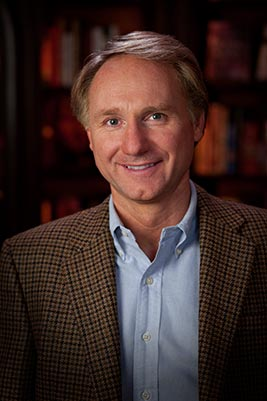

In [1]:
from IPython.display import Image
Image(filename="dan-brown.jpeg") # changed filename to author name picture file

## **P2:** Python &amp; Algorithm Checkup

Fix *ALL* the mistakes in the next cell.

In [2]:
def my_gcd(a, b):
    """
    Input:
      - `a` and `b` are positive integers.

    Output:
      - the integer `m` so that `a|m` and `b|m` and no larger integer has this property.

    Comments:
      - uses Euclid's Algorithm.
    """
    # some type checking
    assert a == abs(int(a)), "%s is not an integer"%(a)
    assert b == abs(int(b))

    while b != 0:
      # a = q * b + r for some quotient `q` and remainder `r`
      r = a % b
      a = b # swapped vars, a = b
      b = r # swapped vars, b = r
    return a

# Test
a = 252
b = 291
print("GCD(", a, ",", b,") :", my_gcd(a, b))

GCD( 252 , 291 ) : 3


## **P3:** Extended Euclidean Algorithm

Use the extended Euclidean algorithm (and a calculator, if you like) to find, if possible, numbers $u$ and $v$ so that:

1.  $527u + 1258v = 17$ 

2.  $291u + 252v = 3$.

Show all steps.

## My Solution:

Let's solve the first problem: $527u + 1258v = 1$

1. Finding the GCD(527, 1258):

\begin{align*}
    \quad 1258 & = 527(2) + 204 \\
    \quad 527 & = 204(2) + 119 \\
    \quad 204 & = 119(1) + 85 \\
    \quad 119 & = 85(1) + 34 \\
    \quad 85 & = 34(2) + 17 \\
    \quad 34 & = 17(2) + 0 
\end{align*}

2. According to Hoffstein's 1.2, the greatest common divisor (GCD) of two integers, a and b, is 1 if a and b are prime. Observing that 1258 is an even number, it is likely composite, whereas 527 is odd. From Step 1, the GCD(527, 1258) is 17, not 1 as expected from the theorem. Therefore, there exist no integers $u$ and $v$ that satisfy $527u + 1258v = 1$.

Let's solve the second problem: $291u + 252v = 3$

1. Finding the GCD(252, 291):

\begin{align*}
    \quad 291 & = 252(1) + 39 \\
    \quad 252 & = 39(6) + 18 \\
    \quad 39 & = 18(2) + 3 \\
    \quad 18 & = 3(6) + 0
\end{align*}

2. Since GCD(252, 291) = 3, we can back substitute to find $u$ and $v$:

\begin{align*}
   \quad 3 & = 39(1) + 18(-2) \\
   & = 252(-2) + 39(13) \\
   & = 291(13) + 252(-15) \\
   & = 252(-15) + 291(13)
\end{align*}

3. From Step 2, we have uncovered that the factors, 13 and -15 satisfy $291u + 252v = 3$. Therefore, $u = 13$ and $v = -15$.


## **P4:** The Euler $\phi$ Function and Primitive Roots

Answer the following.

1.  Determine $\phi(n)$ for each integer $n$.
    *(Write a bit of code, using your `my_gcd` function, to do the hard work for you.)*

    $5, 12, 121, 292$


2.  For which of the following primes $p$ is 3 a primitive root modulo $p$?
    *(Write a bit of code to do the hard work for you.)*

    $5, 7, 11, 17$


3.  Write a bit of code that finds all primitive roots of $\mathbb F_p$ and use it to verify Remark 1.32 for $p=229$.

In [3]:
# Problem 1:

# we can store the numbers from the given problem in a list
nums_list = [5, 12, 121, 292]

def euler_totient(n):
    """
    Input:
      - 'n' is a positive integer.

    Output:
      - the count of prime numbers, 'prime_count', where the ith number is prime, from 1 ... n.

    Comments:
      - uses Euler's Totient Algorithm.
    """
    prime_count = 0
    for i in range(1, n):
        if my_gcd(i, n) == 1:
            prime_count += 1
    return prime_count
  
# let's print the results
print("Problem 1 - Euler Totient values")
for n in nums_list:
    print("phi(", n, ") :", euler_totient(n))
print()

# Problem 2:
    
# we can store the new numbers from the given problem in a list
nums_list = [5, 7, 11, 17]

def is_3_prim_root(p):
    """
    Input:
      - a prime number 'p'.

    Output:
      - Returns true or false whether that 'p' for '3^i mod p', where i is a number 1 ... (n - 1),
        are all distinct numbers.

    Comments:
      - specialized for checking 3 is a primitive root for any 'p'.

    """
    prim_root_of_3_set = set()
    for i in range(1, n):
        power_n = 3 ** i
        prim_root = power_n % p
        if prim_root_of_3_set.__contains__(prim_root):
            return False
        else:
            prim_root_of_3_set.add(prim_root)
    return True

print("Problem 2 - Primitive Root of 3")
prim_root_is_3_list = []
for n in nums_list:
    if is_3_prim_root(n):
      prim_root_is_3_list.append(n)
print(prim_root_is_3_list)
print()

# Problem 3:

def is_prim_root(g, p):
    """
    Input:
      - a potential primitve integer root 'p'
      - a prime number in the field 'g'

    Output:
      - Returns true or false whether 'g' is a primitive root where 'g^i % p', and i is a number 1 ... (n - 1).

    """
    prim = True
    for i in range(1, euler_totient(p)):
        if pow(g, i, p) == 1:
            prim = False
            break
    return prim

def find_prim_roots(p):
    """
    Input:
      - a prime number 'p' in the finite field.

    Output:
      - a list of all the primitive roots with mod p.

    """
    prim_roots = []
    for g in range(2, p):
        if is_prim_root(g, p):
            prim_roots.append(g)
    return prim_roots

print("Problem 3 - Primitive Roots for F_229:")
p = 229
print(find_prim_roots(p))


Problem 1 - Euler Totient values
phi( 5 ) : 4
phi( 12 ) : 4
phi( 121 ) : 110
phi( 292 ) : 144

Problem 2 - Primitive Root of 3
[5, 7, 17]

Problem 3 - Primitive Roots for F_229:
[6, 7, 10, 23, 24, 28, 29, 31, 35, 38, 39, 40, 41, 47, 50, 59, 63, 65, 66, 67, 69, 72, 73, 74, 77, 79, 87, 90, 92, 96, 98, 102, 105, 110, 112, 113, 116, 117, 119, 124, 127, 131, 133, 137, 139, 142, 150, 152, 155, 156, 157, 160, 162, 163, 164, 166, 170, 179, 182, 188, 189, 190, 191, 194, 198, 200, 201, 205, 206, 219, 222, 223]


## **P5:** The Affine Cipher is No Good

Solve Hoffstein's Exercise 1.43(a)-(c).

*Remark.* Arithmetic works the way you expect in finite fields. Unlike, say, $\mathbb Z/12\mathbb Z$; where, e.g., the system
$$
\begin{cases} 2x+y\equiv_{12} 3 \\ x+2y\equiv_{12}2\end{cases}
$$
does not have a unique solution.

# P5 Solution:
Hoffstein's Section 1.43:

Consider the affine cipher with key $k = (k_1, k_2)$ whose encryption and de- cryption functions are given by (1.11) on page 43.

a. Let $p = 541$ and let the key be $k = (34, 71)$. Encrypt the message $m = 204$. Decrypt the ciphertext $c = 431$.

We know from 1.11 that the following are formulas of encryption and decryption:  

$k = (k_1, k_2)$

$e_k(m)$ $≡$ $k_1 · m + k_2$ $mod$ $p$    

$d_k(c)$ $≡$ $k'_1 · (c − k_2)$ $mod$ $p$

Let's use it for $p = 541$, $k = (34, 71)$, and $m = 204$ in encryption:

$e_k(m) $ ≡ $ 34 * 204 + 71$ $mod$ $541$ $=$ 515

Let's use it for $p = 541$, $k = (34, 71)$, and $c = 431$ in decryption:

$d_k(c) $ ≡ $ 497 * (431 - 71)$ $mod$ $541$ $=$ 390


b. Assuming that p is public knowledge, explain why the affine cipher is vulnerable to a known plaintext attack. (See Property 4 on page 38.) How many plain- text/ciphertext pairs are likely to be needed in order to recover the private key?

If the p is public knowledge, it would be easy to eventually crack the plaintext message due its linearty. In order to recover the private key, there would need to be at least one pair to receive the private key, as the bi-directional mapping between the plaintext element and crypt ext will reveal it.

c. Alice and Bob decide to use the prime $p = 601$ for their affine cipher. The value of $p$ is public knowledge, and Eve intercepts the ciphertexts $c_1 = 324$ and $c_2 = 381$ and also manages to find out that the corresponding plaintexts are $m_1 = 387$ and $m_2 = 491$. Determine the private key and then use it to encrypt the message $m_3 = 173$.

Using back-tracking we can figure that the private key is 74, 32 and use it to encrypt $m_3 = 173$ in $e_k(m_3)$.
